# Traffic light detection
## Phase 1: Detect lights in general in a image
### Members of the team: Avigail Wilk, Hadass Wittow and Nechama Verbov
### Credits:
* https://medium.com/@kenan.r.alkiek/https-medium-com-kenan-r-alkiek-traffic-light-recognition-505d6ab913b1
* https://www.pyimagesearch.com/2016/10/31/detecting-multiple-bright-spots-in-an-image-with-python-and-opencv/

In [28]:
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
import imageio as io
import cv2
from scipy import ndimage
import scipy.ndimage.filters as filters

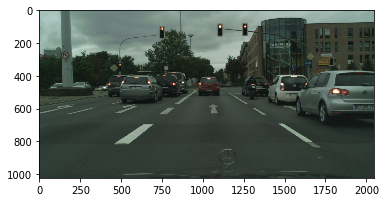

In [29]:
tmp_img = plt.imread(r"C:\Users\User\Documents\ExcellenTeam\Mobileye Project\CityScapes\leftImg8bit\tmp\1.png")
plt.imshow(tmp_img);

### Green and Red High pass filter functions

In [30]:
def hpf_green(img):
    kernel = np.array([[-1/9]*3, [-1/9, 8/9, -1/9], [-1/9]*3])
    hpf_arr = ndimage.convolve(img[:,:,1], kernel) 

    return hpf_arr

def hpf_red(img):
    kernel = np.array([[-1/9]*3, [-1/9, 8/9, -1/9], [-1/9]*3])
    hpf_arr = ndimage.convolve(img[:,:,0], kernel) 

    return hpf_arr

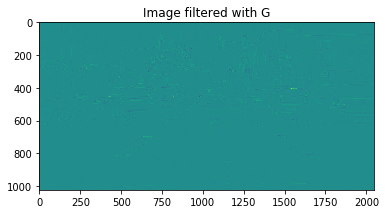

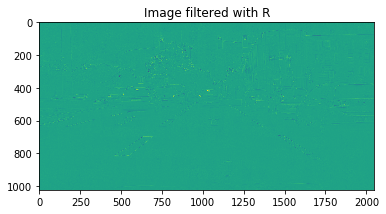

In [31]:
green_filtered_img = hpf_green(tmp_img)
red_filtered_img = hpf_red(tmp_img)

plt.imshow(green_filtered_img);
plt.title("Image filtered with G");
plt.show()
plt.imshow(red_filtered_img);
plt.title("Image filtered with R");
plt.show()

### Finding local max in a filtered image

In [32]:
def local_max(data):
    return filters.maximum_filter(data, size = 25)

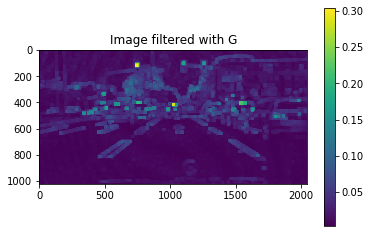

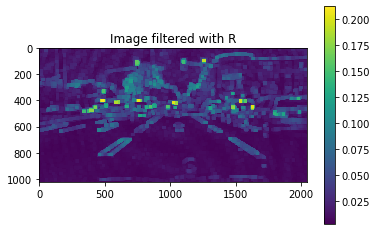

In [33]:
green_max_img = local_max(green_filtered_img)
red_max_img = local_max(red_filtered_img)

plt.imshow(green_max_img);
plt.colorbar()
plt.title("Image filtered with G");
plt.show()
plt.imshow(red_max_img);
plt.colorbar()
plt.title("Image filtered with R");
plt.show()

### Color image with its lights

In [34]:
def green_image_with_lights(img, local_max_img):
    img_copy = img.copy();
    img_copy[local_max_img > img[:,:,1]] = [0, 1, 0]
    
    return img_copy

def red_image_with_lights(img, local_max_img):
    img_copy = img.copy();
    img_copy[local_max_img > img[:,:,0]] = [1, 0, 0]
    
    return img_copy
    

### Get images for light detection

In [35]:
def run_detection_on_images(imgs_dir):
    imgs_arr = glob.glob(os.path.join(imgs_dir, "*.png"))
    
    fig, axes = plt.subplots(NUM_IMGS, 3, figsize=(20, 30))
    
    for i, im in enumerate(imgs_arr[:NUM_IMGS]):
        img = plt.imread(im)
          
        axes[i,0].imshow(img);
        axes[i,0].title.set_text("Original image");
    
        green_filtered_img = hpf_green(img)
        green_max_img = local_max(green_filtered_img)
        axes[i,1].imshow(green_image_with_lights(img, green_max_img));
        axes[i,1].title.set_text("Image filtered with G");
    
        red_filtered_img = hpf_red(img)
        red_max_img = local_max(red_filtered_img)
        axes[i,2].imshow(red_image_with_lights(img, red_max_img));
        axes[i,2].title.set_text("Image filtered with R");
    
plt.show()

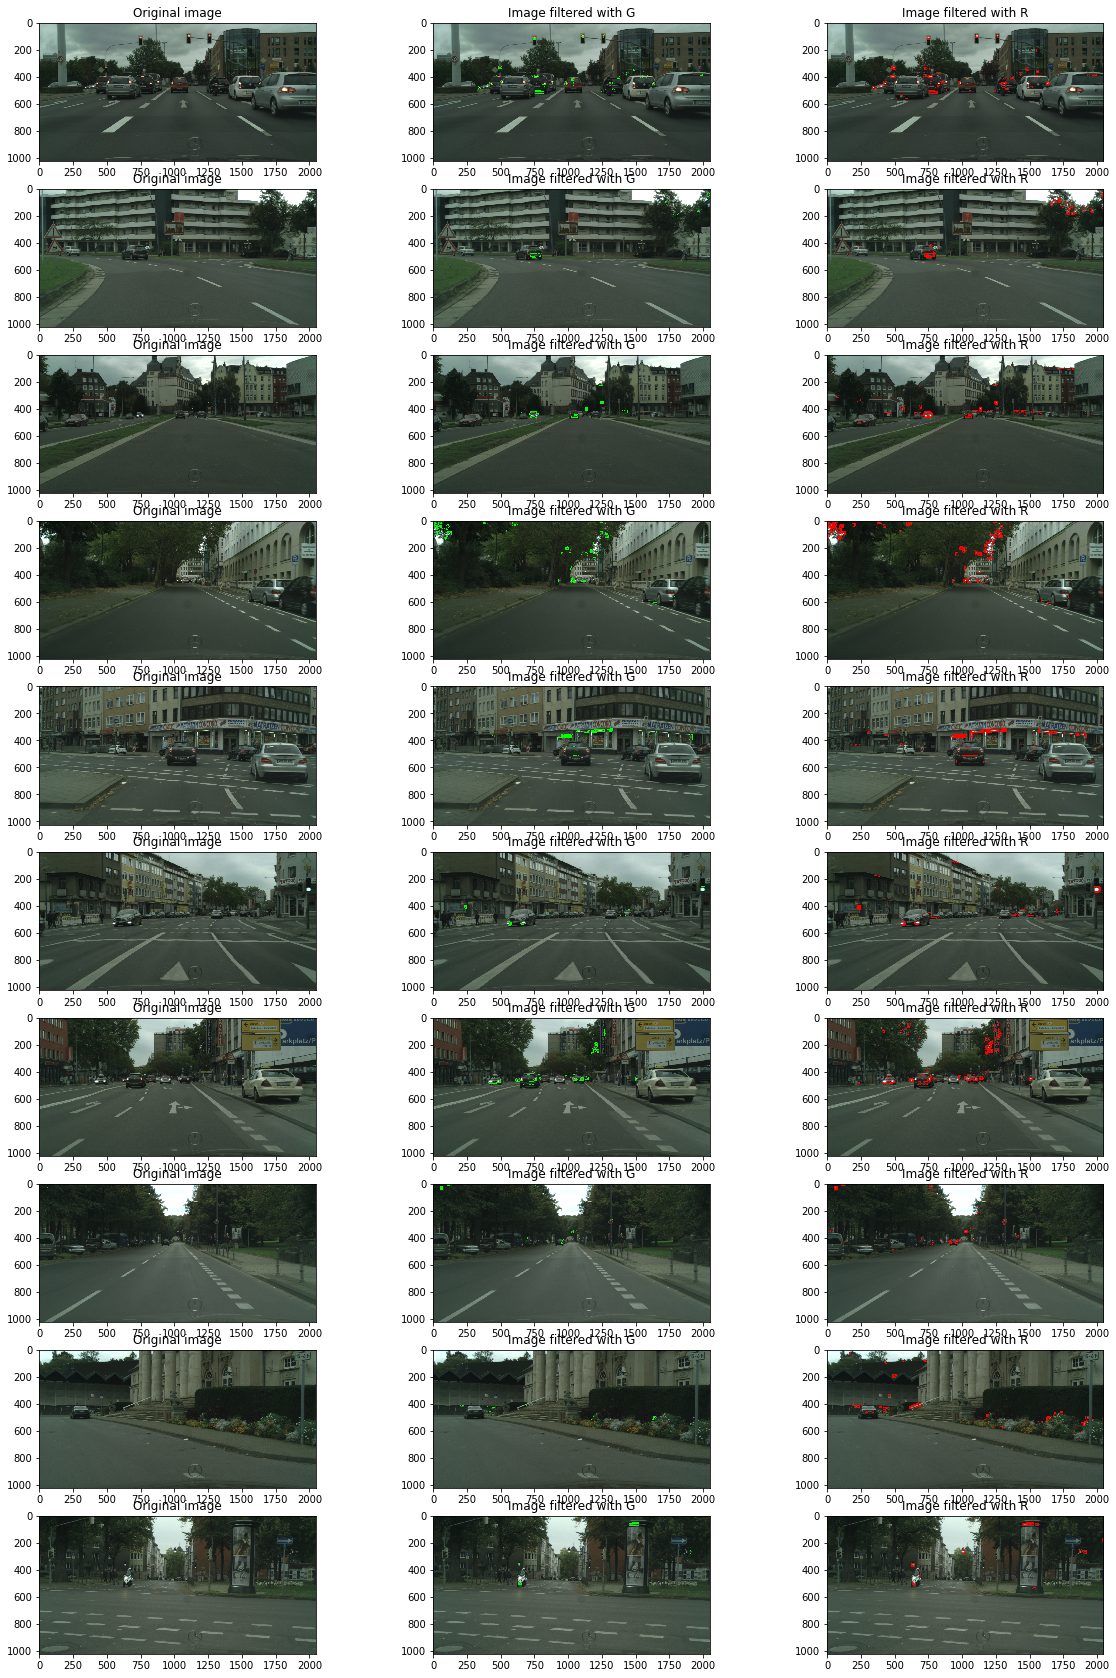

In [36]:
NUM_IMGS = 10
IDX = 0
imgs_dir = r'C:\Users\User\Documents\ExcellenTeam\Mobileye Project\CityScapes\leftImg8bit\tmp'
run_detection_on_images(imgs_dir)